In [ ]:
1. Importing Necessary Libraries



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics 
from sklearn import linear_model
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
import xgboost

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='kS52iSJRefmet3Qy_VRj_DNvEPdmSOhbzoBmVtBoosEE',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'weatherprediction-donotdelete-pr-xji8n4o059hdrq'
object_key = 'weatherAUS.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


3. Analyse the data



In [36]:
data.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [37]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

4. Handling Missing Values

In [38]:
data.isnull().sum()


Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [4]:
data_c=data[["RainToday","WindGustDir","WindDir9am","WindDir3pm"]]


In [6]:
data.drop(columns=["Evaporation","Sunshine","Cloud9am","Cloud3pm"],axis=1,inplace=True)
data.drop(columns=["RainToday","WindGustDir","WindDir9am","WindDir3pm"],axis=1,inplace=True)


In [7]:
data['MinTemp'].fillna(data['MinTemp'].mean(),inplace=True)
data['MaxTemp'].fillna(data['MaxTemp'].mean(),inplace=True)
data['Rainfall'].fillna(data['Rainfall'].mean(),inplace=True)
data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean(),inplace=True)
data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean(),inplace=True)
data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean(),inplace=True)
data['Humidity3pm'].fillna(data['Humidity3pm'].mean(),inplace=True)
data['Humidity9am'].fillna(data['Humidity9am'].mean(),inplace=True)
data['Temp9am'].fillna(data['Temp9am'].mean(),inplace=True)
data['Temp3pm'].fillna(data['Temp3pm'].mean(),inplace=True)


In [8]:
c_names=data_c.columns
from sklearn.impute import SimpleImputer
imp_mode=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
data_c=imp_mode.fit_transform(data_c)
data_c=pd.DataFrame(data_c,columns=c_names)
data_c.tail()


,RainToday,WindGustDir,WindDir9am,WindDir3pm
145455,No,E,SE,ENE
145456,No,NNW,SE,N
145457,No,N,SE,WNW
145458,No,SE,SSE,N
145459,No,W,ESE,ESE


In [14]:
data.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No
1,2008-12-02,Albury,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No
2,2008-12-03,Albury,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No
3,2008-12-04,Albury,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No
4,2008-12-05,Albury,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No


In [15]:
data=pd.concat([data,data_c],axis=1)
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow,RainToday,WindGustDir,WindDir9am,WindDir3pm
0,2008-12-01,Albury,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,W,W,WNW
1,2008-12-02,Albury,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,WNW,NNW,WSW
2,2008-12-03,Albury,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,WSW,W,WSW
3,2008-12-04,Albury,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,NE,SE,E
4,2008-12-05,Albury,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,W,ENE,NW


5.Data Visualisation

In [9]:
corr=data.corr()
sb.heatmap(data=corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

NameError: name 'sb' is not defined

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


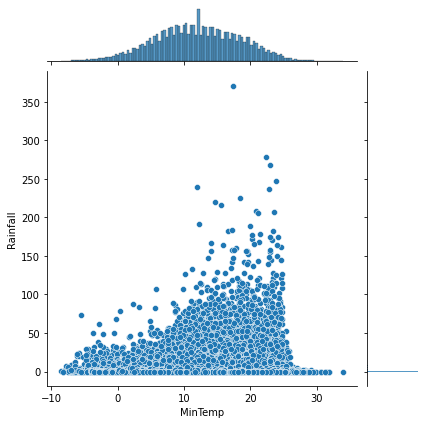

In [17]:
sb.jointplot(data["MinTemp"],data['Rainfall'])


<AxesSubplot:>

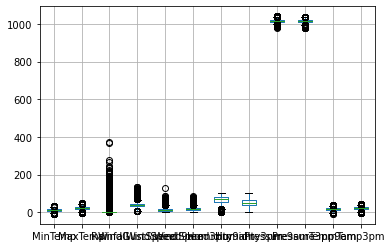

In [10]:
data.boxplot()


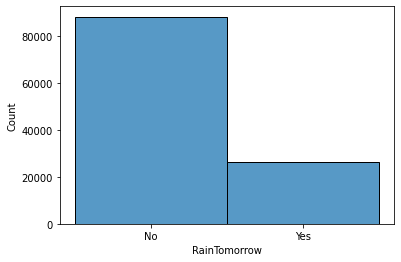

In [19]:
sb.histplot(data['RainTomorrow'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


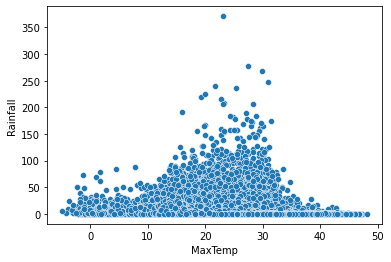

In [20]:
sb.scatterplot(data['MaxTemp'],data['Rainfall'])


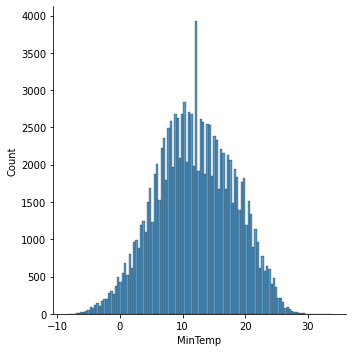

In [21]:
sb.displot(data['MinTemp'])


6. Splitting The Dateset Into Dependent And Independent Variable



In [35]:
from sklearn.preprocessing import StandardScaler
data = data[data['RainTomorrow'].notnull()]
data['Pressure9am'].fillna(data['Pressure9am'].mean(),inplace=True)
data['Pressure3pm'].fillna(data['Pressure3pm'].mean(),inplace=True)
y=data['RainTomorrow']
x=data.drop('RainTomorrow',axis=1)
set(y)

{'No', 'Yes'}

In [36]:
x=x.drop('Date',axis=1)
names=x.columns
names

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [24]:
sc=StandardScaler()
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
print(len(x),len(y))

114744 114744


7. Label Encoding



In [25]:
LE = LabelEncoder()
x['Location'] = LE.fit_transform(x['Location'])
x.head()

LE = LabelEncoder()
x['RainToday'] = LE.fit_transform(x['RainToday'])
x.head()

LE = LabelEncoder()
x['WindGustDir'] = LE.fit_transform(x['WindGustDir'])
x.head()

LE = LabelEncoder()
x['WindDir9am'] = LE.fit_transform(x['WindDir9am'])
x.head()

LE = LabelEncoder()
x['WindDir3pm'] = LE.fit_transform(x['WindDir3pm'])
x.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,WindGustDir,WindDir9am,WindDir3pm
0,2,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,13,13,14
1,2,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,14,6,15
2,2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,15,13,15
3,2,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,4,9,0
4,2,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,13,1,7


In [26]:
LE = LabelEncoder()
y=pd.DataFrame(y)
y = LE.fit_transform(y)
print(len(x),len(y))

114744 114744


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
sc=StandardScaler()
x=sc.fit_transform(x)
x[:6]

array([[-1.46777032,  0.23001664,  0.0218848 , -0.21056865,  0.30859267,
         0.66690157,  0.57425345,  0.03964877, -1.51736666, -1.54504131,
        -1.30696923,  0.04885308,  0.08034527, -0.54026451,  1.00960642,
         1.26877752,  1.3104739 ],
       [-1.46777032, -0.73369277,  0.34188104, -0.28068579,  0.30859267,
        -1.09827314,  0.35263648, -1.44922665, -1.36929739, -1.11208305,
        -1.20091615,  0.09693006,  0.45631879, -0.54026451,  1.22294228,
        -0.28403031,  1.52594335],
       [-1.46777032,  0.14970752,  0.42915274, -0.28068579,  0.45922331,
         0.55657815,  0.79587043, -1.78008785, -1.12251526, -1.5599709 ,
        -1.06456217,  0.70590515,  0.29089044, -0.54026451,  1.43627813,
         1.26877752,  1.52594335],
       [-1.46777032, -0.44457995,  0.76369426, -0.28068579, -1.19771369,
        -0.3260092 , -1.08787385, -1.39408311, -1.81350522, -0.06701137,
        -0.44339409,  0.241161  ,  0.78717549, -0.54026451, -0.91041632,
         0.38145876

In [28]:
x=pd.DataFrame(x,columns=names)


8. Splitting The Data Into Train And Test



In [11]:
y=data['RainTomorrow']
x=data.drop('RainTomorrow',axis=1)
print(" X-values:")
print(x)
print("Y-values:")
print(y)

 X-values:
              Date Location  MinTemp    MaxTemp  Rainfall  WindGustSpeed  \
0       2008-12-01   Albury     13.4  22.900000       0.6       44.00000   
1       2008-12-02   Albury      7.4  25.100000       0.0       44.00000   
2       2008-12-03   Albury     12.9  25.700000       0.0       46.00000   
3       2008-12-04   Albury      9.2  28.000000       0.0       24.00000   
4       2008-12-05   Albury     17.5  32.300000       1.0       41.00000   
...            ...      ...      ...        ...       ...            ...   
145455  2017-06-21    Uluru      2.8  23.400000       0.0       31.00000   
145456  2017-06-22    Uluru      3.6  25.300000       0.0       22.00000   
145457  2017-06-23    Uluru      5.4  26.900000       0.0       37.00000   
145458  2017-06-24    Uluru      7.8  27.000000       0.0       28.00000   
145459  2017-06-25    Uluru     14.9  23.221348       0.0       40.03523   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \

In [ ]:
sc=StandardScaler()
# fitting an transforming the data into standard
x=sc.fit_transform(x)
 
x= pd.DataFrame(x, columns=names)

9. Training And Testing The Model



In [19]:
from sklearn import model_selection 
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y, test_size=0.2, random_state =0)
print("Train set:")
print(x_train,y_train)
print("Test set:")
print(x_test,y_test)

Train set:
              Date       Location  MinTemp  MaxTemp  Rainfall  WindGustSpeed  \
22926   2014-03-12  NorfolkIsland     18.8     23.7       0.2           52.0   
80735   2016-10-06       Watsonia      9.3     24.0       0.2           48.0   
121764  2011-08-31          Perth     10.9     22.2       1.4           26.0   
139821  2010-06-11         Darwin     19.3     29.9       0.0           43.0   
1867    2014-04-10         Albury     15.7     17.6      12.4           20.0   
...            ...            ...      ...      ...       ...            ...   
41993   2015-12-20    Williamtown     17.8     38.1       0.0           39.0   
97639   2012-03-11       Adelaide     12.5     27.3       0.0           30.0   
95939   2016-06-10     Townsville     17.0     29.8       0.0           22.0   
117952  2009-11-20   PerthAirport     11.9     22.0       3.8           35.0   
43567   2011-10-17     Wollongong     12.0     16.7       0.8           50.0   

        WindSpeed9am  WindSp

In [20]:
import sklearn
XGBoost = xgboost.XGBRFClassifier()
Rand_forest = sklearn.ensemble. RandomForestClassifier()
svm=sklearn.svm.SVC()
Dtree=sklearn.tree. DecisionTreeClassifier()
GBM = sklearn.ensemble. GradientBoostingClassifier()
log=sklearn.linear_model.LogisticRegression()

In [ ]:
XGBoost.fit(x_train,y_train)
Rand_forest.fit(x_train, y_train)
svm.fit(x_train,y_train) 
Dtree.fit(x_train,y_train)
GBM.fit(x_train,y_train)
log.fit(x_train,y_train)

In [ ]:
p1=XGBoost.predict(x_train) 
P2=Rand_forest.predict(x_train)
p3=svm.predict(x_train) 
p4 = Dtree.predict(x_train)
p5=GBM.predict(x_train)
p6= log.predict(x_train)

In [ ]:
x.isnull().any()


10. Model Evaluation



In [33]:
import sklearn.metrics as metrics
print(metrics.accuracy_score(y_train,p1))
print(metrics.accuracy_score(y_test,p2))

0.9999455308023313
0.8492309033073336


In [13]:
!pip install ibm_watson_machine_learning

In [15]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"9GFCrg2lAs5F9nVV7HergxNi69_lgDJL2mk3MdI-OJou"
}
client = APIClient(wml_credentials)

In [21]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return (next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [22]:
space_uid=guid_from_space_name(client, 'guid')
print("Space UID = " +space_uid)

Space UID = 73d20877-93a1-4288-97ea-2565d723927c


In [24]:
client.set.default_space(space_uid)

'SUCCESS'

In [25]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [ ]:
software_spec_uid = client.software_specifications.get_uid_by_name("default_py3.7")
software_spec_uid

In [ ]:
model_details = client.repository.store_model(model=Rand_forest,meta_props={
    client.repository.ModelMetaNames.NAMES:"WeatherAUS",
    client.repository.ModelMetaNames.TYPE:"scikit-learn_0.23",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid})
model_id = client_repository.get_model_uid(model_details)

In [ ]:
11. Save The Model



In [34]:
import pickle
pickle.dump(RFC,open('rainfall.pkl','wb'))
pickle.dump(LE,open('encoder.pkl','wb'))
pickle.dump(imp_mode,open('imputer.pkl','wb'))
pickle.dump(sc,open('scale.pkl','wb'))

In [ ]:
x_train[0]